<a href="https://colab.research.google.com/github/azavalae/fisica_computacional/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/azavalae/fisica_computacional/main/Actividad1/26053.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31655 entries, 0 to 31654
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   31655 non-null  datetime64[ns]
 1   Precip  31402 non-null  float64       
 2   Evap    196 non-null    float64       
 3   Tmax    31551 non-null  float64       
 4   Tmin    31648 non-null  float64       
 5   Año     31655 non-null  int64         
 6   Mes     31655 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.7 MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1927-02-01     0.0   NaN  26.5  13.5  1927    2
1 1927-02-02     0.0   NaN  27.0  13.8  1927    2
2 1927-02-03     0.0   NaN  24.1  12.8  1927    2
3 1927-02-04     0.0   NaN  26.5  11.7  1927    2
4 1927-02-05     0.0   NaN  25.5   9.8  1927    2
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
31650 2016-04-26     0.0   NaN  33.0  12.0  2016    4
31651 2016-04-27   

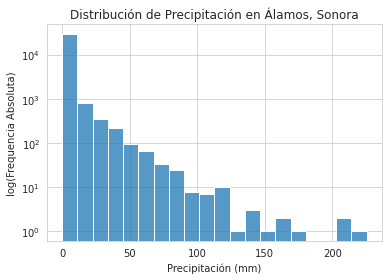

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Álamos, Sonora')
sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True));

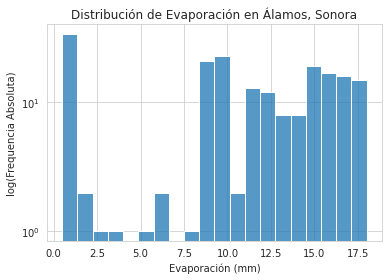

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Evaporación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Evaporación en Álamos, Sonora')
sns.histplot(data=df_meteo, x='Evap', bins=20, log_scale=(False,True));

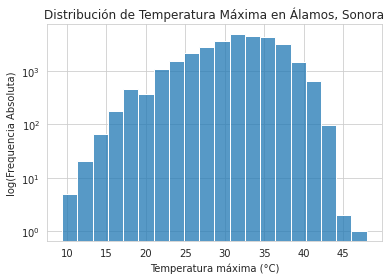

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Temperatura máxima (°C)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Temperatura Máxima en Álamos, Sonora')
sns.histplot(data=df_meteo, x='Tmax', bins=20, log_scale=(False,True));

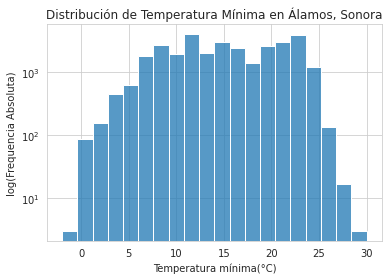

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Temperatura mínima(°C)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Temperatura Mínima en Álamos, Sonora')
sns.histplot(data=df_meteo, x='Tmin', bins=20, log_scale=(False,True));

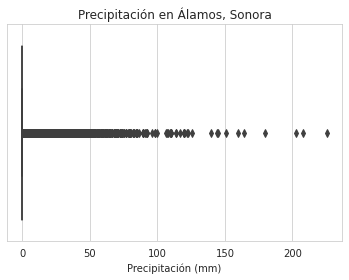

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Precip, data=df_meteo, orient='h').set(xlabel='Precipitación (mm)', 
                                                     title='Precipitación en Álamos, Sonora');

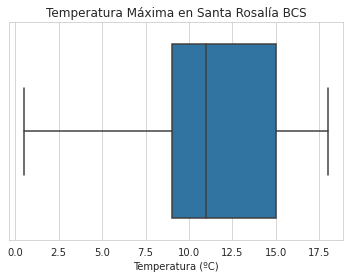

In [ ]:
sns.set_style("whitegrid") 

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Evaporación (mm)', 
                                                     title='Evaporación en Álamos, Sonora');

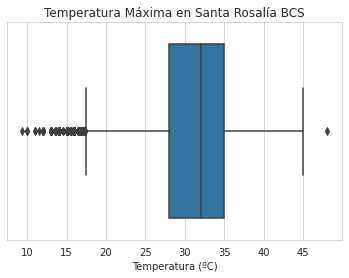

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (°C)', 
                                                     title='Temperatura Máxima en Álamos, Sonora');

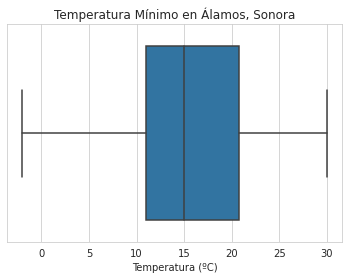

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínimo en Álamos, Sonora');

In [ ]:
df_30 = df_meteo[(df_meteo['Año'] >= 1930) & (df_meteo['Año'] < 1960)]
df_60 = df_meteo[(df_meteo['Año'] >= 1960) & (df_meteo['Año'] < 1990)]
df_90 = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2018)]

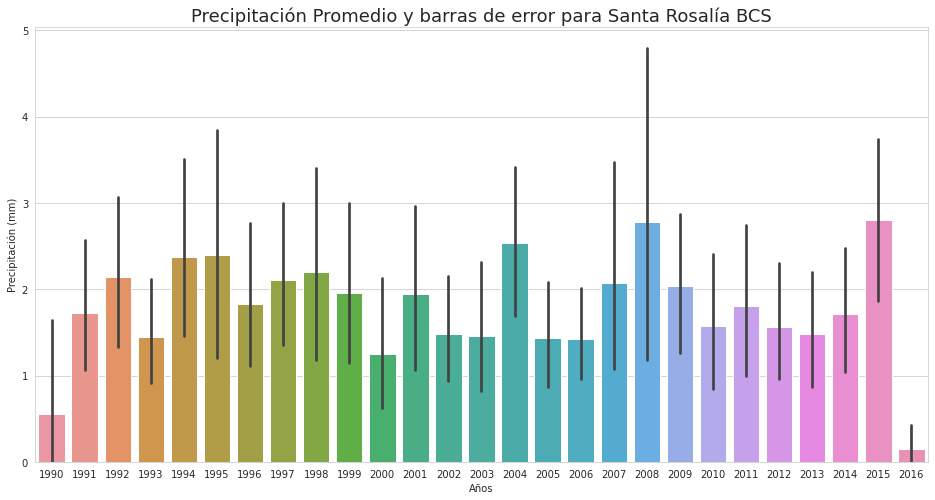

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Álamos, Sonora', fontsize=18)

plt.show()

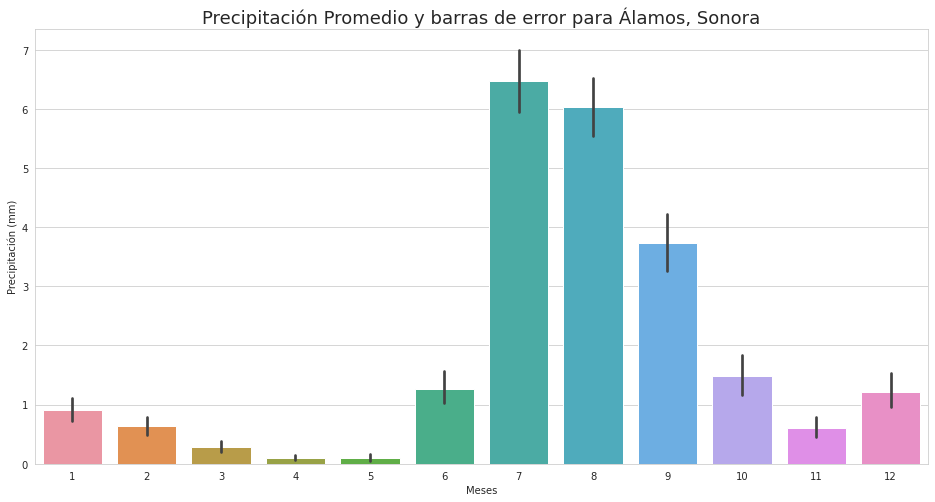

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Álamos, Sonora', fontsize=18)

plt.show()

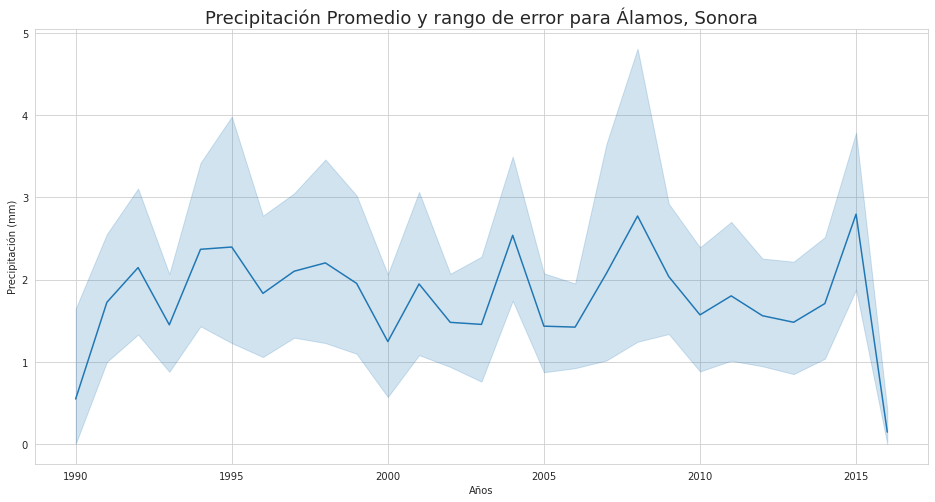

In [ ]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Álamos, Sonora', fontsize=18)

plt.show()

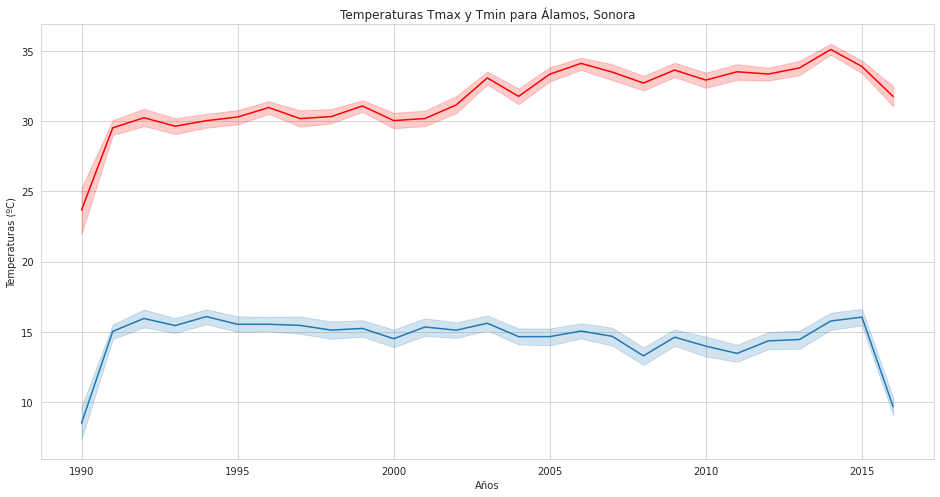

In [ ]:
# Gráfica de Temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_90, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Álamos, Sonora')

plt.show()

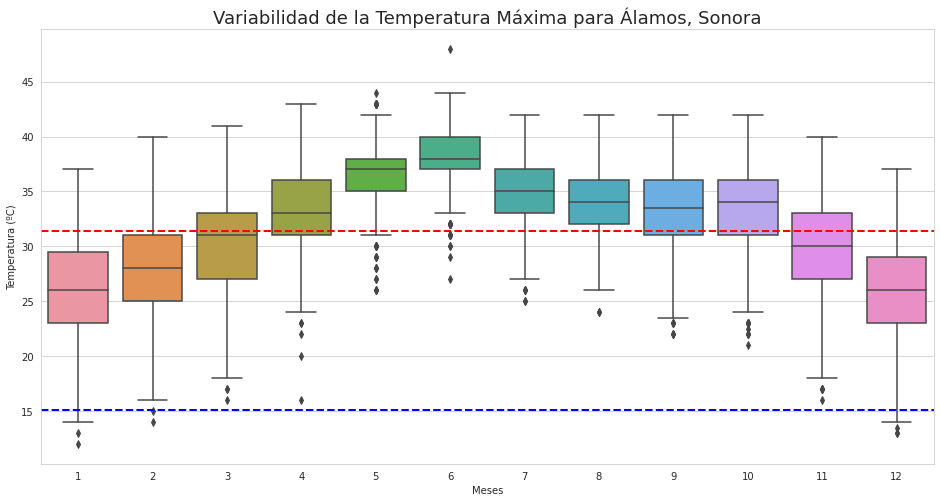

mean(Tmax) =  31.40434851510261
mean(Tmin) =  15.111890166835193
Diff Tmax_ave-Tmin_ave =  16.292458348267417


In [ ]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Álamos, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

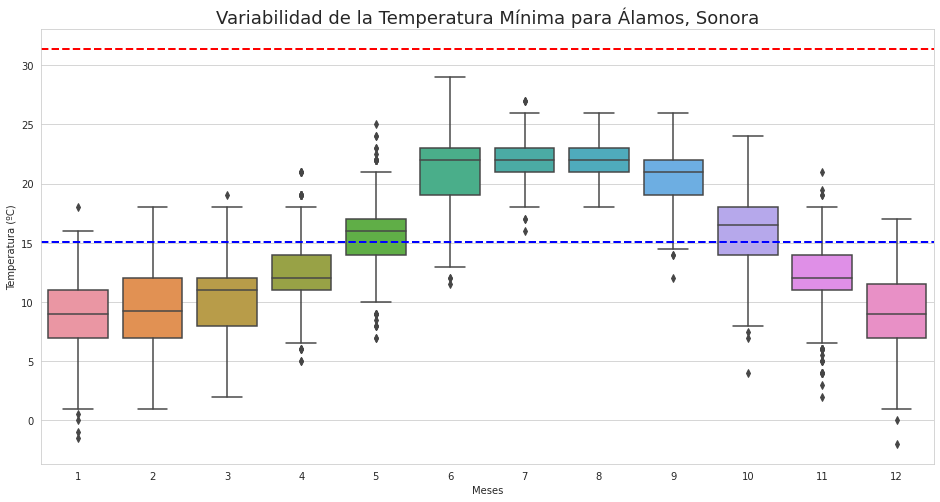

mean(Tmax) =  31.40434851510261
mean(Tmin) =  15.111890166835193
Diff Tmax_ave-Tmin_ave =  16.292458348267417


In [ ]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Álamos, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))